In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [24]:
# Cargar el dataset de dígitos
digits = load_digits()

In [25]:
X = digits.data
y = digits.target

In [39]:
X[1:2]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [26]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_scaled[1:2]

array([[ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.26875116,
        -0.13801953, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        -1.91557297, -0.24630352,  1.19644995,  0.13619465, -0.51499146,
        -0.13043338, -0.04462507, -0.72764628, -1.2133854 ,  1.38030848,
         1.44186017, -0.29155283, -0.54880546, -0.11422184, -0.03337973,
         1.44018517,  0.95451315,  1.22058589,  0.98740215, -0.94558832,
        -0.62889588, -0.04723238,  0.        , -0.67237227, -1.05445197,
         1.10556952,  0.96064411, -0.97870236, -0.82269451,  0.        ,
        -0.06134367, -0.5312841 , -0.89983895,  1.36217503,  1.33078862,
        -0.39278683, -0.79827225, -0.08874162, -0.03543326, -0.40357499,
        -1.15311752,  1.23639392,  1.24208282, -0.45750018, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135, -1.08938309, -0.24900951,
         0.84963214,  0.54856067, -0.5056698 , -0.19600752]])

In [27]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# Convertir los datos a tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [29]:
# Crear DataLoader para iterar sobre los datos
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [30]:
# Definir la arquitectura de la red neuronal
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [31]:
# Instanciar la red neuronal, la función de pérdida y el optimizador
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [32]:
# Número de épocas
num_epochs = 10

In [33]:
# Listas para almacenar los valores de pérdida y precisión
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

In [34]:
def calculate_accuracy(output, target):
    _, predicted = torch.max(output, 1)
    correct = (predicted == target).sum().item()
    accuracy = correct / len(target)
    return accuracy

In [35]:
# Entrenar la red neuronal
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_corrects += (output.argmax(1) == target).sum().item()
    
    # Calcular y almacenar la pérdida promedio y precisión de entrenamiento
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = running_corrects / len(X_train_tensor)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    # Evaluar en el conjunto de prueba
    model.eval()
    test_loss = 0.0
    test_corrects = 0
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor).item()
        test_corrects = (test_output.argmax(1) == y_test_tensor).sum().item()
        
    # Calcular y almacenar la pérdida y precisión de prueba
    test_losses.append(test_loss / len(X_test_tensor))
    test_accuracies.append(test_corrects / len(X_test_tensor))
    
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_loss:.4f} - Train Accuracy: {epoch_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_corrects / len(X_test_tensor):.4f}')


Epoch 1/10 - Train Loss: 2.3021 - Train Accuracy: 0.0884 - Test Loss: 2.2838 - Test Accuracy: 0.1028
Epoch 2/10 - Train Loss: 2.2830 - Train Accuracy: 0.0960 - Test Loss: 2.2672 - Test Accuracy: 0.1111
Epoch 3/10 - Train Loss: 2.2639 - Train Accuracy: 0.1030 - Test Loss: 2.2496 - Test Accuracy: 0.1056
Epoch 4/10 - Train Loss: 2.2430 - Train Accuracy: 0.1218 - Test Loss: 2.2298 - Test Accuracy: 0.1389
Epoch 5/10 - Train Loss: 2.2192 - Train Accuracy: 0.1566 - Test Loss: 2.2067 - Test Accuracy: 0.1917
Epoch 6/10 - Train Loss: 2.1906 - Train Accuracy: 0.2331 - Test Loss: 2.1787 - Test Accuracy: 0.2694
Epoch 7/10 - Train Loss: 2.1561 - Train Accuracy: 0.3375 - Test Loss: 2.1442 - Test Accuracy: 0.3583
Epoch 8/10 - Train Loss: 2.1132 - Train Accuracy: 0.4203 - Test Loss: 2.1013 - Test Accuracy: 0.4194
Epoch 9/10 - Train Loss: 2.0603 - Train Accuracy: 0.4760 - Test Loss: 2.0475 - Test Accuracy: 0.4500
Epoch 10/10 - Train Loss: 1.9947 - Train Accuracy: 0.5087 - Test Loss: 1.9808 - Test Accura

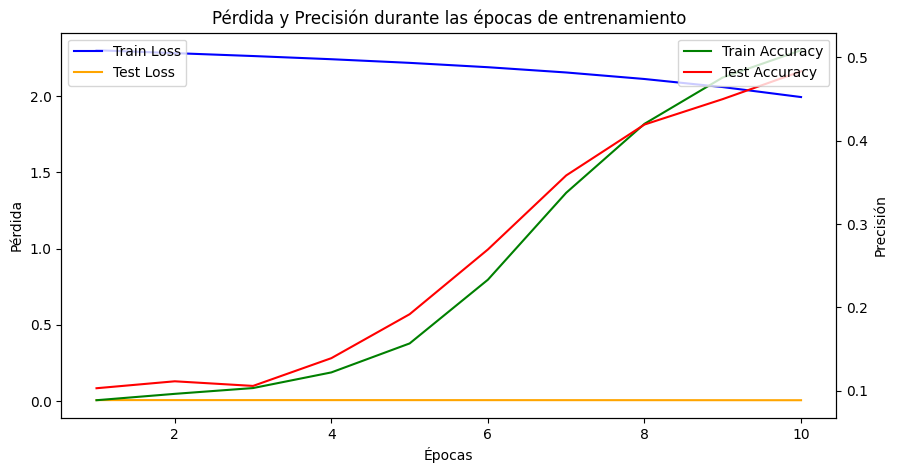

In [36]:
# Graficar la pérdida y precisión por cada época
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", color="blue")
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss", color="orange")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida y Precisión durante las épocas de entrenamiento")
plt.legend(loc='upper left')

plt.twinx()
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy", color="green")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy", color="red")
plt.ylabel("Precisión")
plt.legend(loc='upper right')

plt.show()